# Notebook comparativo
### Modelo de demo tree vs Sklearn

#### Carregando datasets que serão utilizados para análise

In [1]:
import os
import sys

In [66]:
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate

RANDOM_STATE = 42

iris = load_iris()
breast_cancer = load_breast_cancer()
wine = load_wine()


In [39]:
def intervalo_conf(resultados):
  media = resultados['test_score'].mean()
  desvio_padrao = resultados['test_score'].std()
  print(f'Intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1)}]')

## Demo Tree

In [3]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [4]:
from tree import DecisionTree 

### Iris

In [105]:
X,y  = iris.data, iris.target

Modelo dummy utilizado para ter uma base de acerto, a acurácia do modelo deve ser maior que a do dummy.

In [9]:
from sklearn.dummy import DummyClassifier

dm = DummyClassifier()

dm.fit(X,y)

dm.score(X,y)

0.3333333333333333

#### Acurácia

In [106]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

demo_iris = DecisionTree(random_state=RANDOM_STATE) 

demo_iris_accuracy_cv = cross_validate(demo_iris, X,y, cv=skf, scoring='accuracy')

In [107]:
demo_iris_accuracy_cv['test_score']

array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.6       ])

In [108]:
intervalo_conf(demo_iris_accuracy_cv)

Intervalo de confiança: [0.6199999999999999, 0.7]


### Breast Cancer

In [112]:
X,y  = breast_cancer.data, breast_cancer.target

Modelo dummy utilizado para ter uma base de acerto, a acurácia do modelo deve ser maior que a do dummy.

In [15]:
from sklearn.dummy import DummyClassifier

dm = DummyClassifier()

dm.fit(X,y)

dm.score(X,y)

0.6274165202108963

#### Acurácia

In [114]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

demo_breast_cancer = DecisionTree(random_state=RANDOM_STATE) 

demo_breast_cancer_accuracy_cv = cross_validate(demo_breast_cancer, X,y, cv=skf, scoring='accuracy')

In [115]:
demo_breast_cancer_accuracy_cv['test_score']

array([0.9122807 , 0.87719298, 0.89473684, 0.80701754, 0.9122807 ,
       0.92982456, 0.9122807 , 0.85964912, 0.89473684, 0.98214286])

In [116]:
intervalo_conf(demo_breast_cancer_accuracy_cv)

Intervalo de confiança: [0.8112499142842036, 0.9851786571443677]


#### Precision Score

In [117]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

demo_breast_cancer = DecisionTree(random_state=RANDOM_STATE) 

demo_breast_cancer_precision_cv = cross_validate(demo_breast_cancer, X,y, cv=skf, scoring='precision')

In [118]:
demo_breast_cancer_precision_cv['test_score']

array([0.91666667, 1.        , 0.91666667, 0.82051282, 0.87804878,
       1.        , 0.96969697, 0.96666667, 0.91666667, 1.        ])

In [119]:
intervalo_conf(demo_breast_cancer_precision_cv)

Intervalo de confiança: [0.8251456768149092, 1]


#### Recall Score

In [121]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

demo_breast_cancer = DecisionTree(random_state=RANDOM_STATE) 

demo_breast_cancer_recall_cv = cross_validate(demo_breast_cancer, X,y, cv=skf, scoring='recall')

In [122]:
demo_breast_cancer_recall_cv['test_score']

array([0.94285714, 0.8       , 0.91666667, 0.88888889, 1.        ,
       0.88888889, 0.88888889, 0.80555556, 0.91666667, 0.97142857])

In [123]:
intervalo_conf(demo_breast_cancer_recall_cv)

Intervalo de confiança: [0.780748675199332, 1]


#### F1-Score 

In [124]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

demo_breast_cancer = DecisionTree(random_state=RANDOM_STATE) 

demo_breast_cancer_f1_cv = cross_validate(demo_breast_cancer, X,y, cv=skf, scoring='f1')

In [125]:
demo_breast_cancer_f1_cv['test_score']

array([0.92957746, 0.88888889, 0.91666667, 0.85333333, 0.93506494,
       0.94117647, 0.92753623, 0.87878788, 0.91666667, 0.98550725])

In [126]:
intervalo_conf(demo_breast_cancer_f1_cv)

Intervalo de confiança: [0.8475313786944588, 0.9871097779147825]


### Wine

In [127]:
X,y  = wine.data, wine.target

Modelo dummy utilizado para ter uma base de acerto, a acurácia do modelo deve ser maior que a do dummy.

In [30]:
from sklearn.dummy import DummyClassifier

dm = DummyClassifier()

dm.fit(X,y)

dm.score(X,y)

0.398876404494382

#### Acurácia

In [128]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

demo_wine = DecisionTree(random_state=RANDOM_STATE) 

demo_wine_accuracy_cv = cross_validate(demo_wine, X,y, cv=skf, scoring='accuracy')

In [130]:
demo_wine_accuracy_cv['test_score']

array([0.88888889, 1.        , 0.83333333, 0.88888889, 0.5       ,
       0.88888889, 0.94444444, 0.55555556, 0.82352941, 0.82352941])

In [132]:
intervalo_conf(demo_wine_accuracy_cv)

Intervalo de confiança: [0.5085185309201083, 1]


## Sklearn Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

### Iris

In [53]:
X,y  = iris.data, iris.target

Modelo dummy utilizado para ter uma base de acerto, a acurácia do modelo deve ser maior que a do dummy.

In [54]:
from sklearn.dummy import DummyClassifier

dm = DummyClassifier()

dm.fit(X,y)

dm.score(X,y)

0.3333333333333333

#### Acurácia

In [76]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

sklearn_iris = DecisionTreeClassifier(random_state=RANDOM_STATE) 

sklearn_iris_accuracy_cv = cross_validate(sklearn_iris, X,y, cv=skf, scoring='accuracy')

In [77]:
sklearn_iris_accuracy_cv['test_score']

array([0.9122807 , 0.92982456, 0.96491228, 0.89473684, 0.89473684,
       0.96491228, 0.92982456, 0.9122807 , 0.92982456, 0.92857143])

In [78]:
intervalo_conf(sklearn_iris_accuracy_cv)

Intervalo de confiança: [0.8796730781827408, 0.9727078741982117]


### Breast Cancer

In [70]:
X,y  = breast_cancer.data, breast_cancer.target

Modelo dummy utilizado para ter uma base de acerto, a acurácia do modelo deve ser maior que a do dummy.

In [71]:
from sklearn.dummy import DummyClassifier

dm = DummyClassifier()

dm.fit(X,y)

dm.score(X,y)

0.6274165202108963

#### Acurácia

In [79]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

sklearn_breast_cancer = DecisionTreeClassifier(random_state=RANDOM_STATE) 

sklearn_breast_cancer_accuracy_cv = cross_validate(sklearn_breast_cancer, X,y, cv=skf, scoring='accuracy')

In [80]:
sklearn_breast_cancer_accuracy_cv['test_score']

array([0.9122807 , 0.92982456, 0.96491228, 0.89473684, 0.89473684,
       0.96491228, 0.92982456, 0.9122807 , 0.92982456, 0.92857143])

In [81]:
intervalo_conf(sklearn_breast_cancer_accuracy_cv)

Intervalo de confiança: [0.8796730781827408, 0.9727078741982117]


#### Precision Score

In [82]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

sklearn_breast_cancer = DecisionTreeClassifier(random_state=RANDOM_STATE) 

sklearn_breast_cancer_precision_cv = cross_validate(sklearn_breast_cancer, X,y, cv=skf, scoring='precision')

In [83]:
sklearn_breast_cancer_precision_cv['test_score']

array([0.96875   , 0.91891892, 0.94736842, 0.875     , 0.94117647,
       0.94736842, 0.94444444, 1.        , 0.92105263, 0.94285714])

In [84]:
intervalo_conf(sklearn_breast_cancer_precision_cv)

Intervalo de confiança: [0.8787644806516555, 1]


#### Recall Score

In [88]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

sklearn_breast_cancer = DecisionTreeClassifier(random_state=RANDOM_STATE) 

sklearn_breast_cancer_recall_cv = cross_validate(sklearn_breast_cancer, X,y, cv=skf, scoring='recall')

In [89]:
sklearn_breast_cancer_recall_cv['test_score']

array([0.88571429, 0.97142857, 1.        , 0.97222222, 0.88888889,
       1.        , 0.94444444, 0.86111111, 0.97222222, 0.94285714])

In [90]:
intervalo_conf(sklearn_breast_cancer_recall_cv)

Intervalo de confiança: [0.8502433415513073, 1]


#### F1-Score 

In [91]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

sklearn_breast_cancer = DecisionTreeClassifier(random_state=RANDOM_STATE) 

sklearn_breast_cancer_f1_cv = cross_validate(sklearn_breast_cancer, X,y, cv=skf, scoring='f1')

In [92]:
sklearn_breast_cancer_f1_cv['test_score']

array([0.92537313, 0.94444444, 0.97297297, 0.92105263, 0.91428571,
       0.97297297, 0.94444444, 0.92537313, 0.94594595, 0.94285714])

In [93]:
intervalo_conf(sklearn_breast_cancer_f1_cv)

Intervalo de confiança: [0.9025216491991173, 0.9794228584327431]


### Wine

In [94]:
X,y  = wine.data, wine.target

Modelo dummy utilizado para ter uma base de acerto, a acurácia do modelo deve ser maior que a do dummy.

In [95]:
from sklearn.dummy import DummyClassifier

dm = DummyClassifier()

dm.fit(X,y)

dm.score(X,y)

0.398876404494382

#### Acurácia

In [100]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

sklearn_wine = DecisionTreeClassifier(random_state=RANDOM_STATE) 

sklearn_wine_accuracy_cv = cross_validate(sklearn_wine, X,y, cv=skf, scoring='accuracy')

In [101]:
sklearn_wine_accuracy_cv['test_score']

array([0.94444444, 0.88888889, 0.83333333, 0.88888889, 0.88888889,
       0.88888889, 1.        , 0.72222222, 0.94117647, 1.        ])

In [102]:
intervalo_conf(sklearn_wine_accuracy_cv)

Intervalo de confiança: [0.7444791920555823, 1]


## Teste McNemar

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from tree import DecisionTree
import numpy as np

X,y = breast_cancer.data, breast_cancer.target


X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)


demo_tree = DecisionTree(random_state=RANDOM_STATE, max_depth=3)
sk_tree =  DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=3)

demo_tree.fit(X_train, y_train)
sk_tree.fit(X_train, y_train)


y_pred_demo = demo_tree.predict(X_val)
y_pred_sk = sk_tree.predict(X_val)


print(f"Acurácia Demo Tree: {accuracy_score(y_val, y_pred_demo)}")
print(f"Acurácia Scikit-learn Tree: {accuracy_score(y_val, y_pred_sk)}")


Acurácia Demo Tree: 0.9035087719298246
Acurácia Scikit-learn Tree: 0.9385964912280702


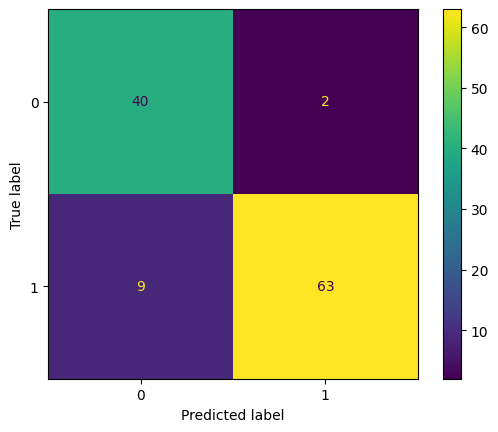

In [144]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_demo);

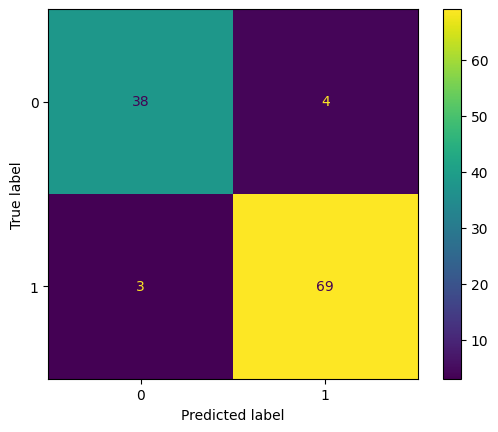

In [145]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_sk);

In [150]:
from statsmodels.stats.contingency_tables import mcnemar

demo_correct = (y_pred_demo == y_val)
sk_correct = (y_pred_sk == y_val)

b = np.sum(demo_correct & ~sk_correct)
c = np.sum(~demo_correct & sk_correct)

table = [[0, b],
         [c, 0]]

result = mcnemar(table, exact=False, correction=True)

p_value = result.pvalue

str_result = ""

if p_value < 0.05:
    str_result = "Diferença significativa, os modelos têm desempenhos diferentes"
else:
    str_result = "Não há diferença estatiscamente significativa"


print("\n--- Teste de McNemar ---")
print(f"b = {b}, c = {c}")
print(f"Chi-square = {result.statistic}")
print(f"p-value = {result.pvalue}")
print(str_result)



--- Teste de McNemar ---
b = 2, c = 6
Chi-square = 1.125
p-value = 0.2888443663464818
Não há diferença estatiscamente significativa
